# Setup and Data

In [1]:
from inflation_analysis import calculate_price_indexes, tri_grouping, output_data, output_obs_table, price_index_over_time, top_abs_weight_differences, top_price_index_contributors, tri_grouping_extended

In [2]:
# Parameters
start_year = 2021
end_year = 2022
data_folder="/Users/roykisluk/Downloads/Consumer_Expenditure_Survey/"
top_n = 10
base_year = start_year
comparison_year = end_year

# Grouping
demo, income, ses, total_mmb = tri_grouping_extended(start_year, end_year, cex_data_folder = data_folder)

In [3]:
# Prepare data: calculate price indexes for each group, secondary and primary categories, and total
demo_analysis, demo_mmb = output_data(demo, start_year, end_year, base_year, top_n, data_folder)
income_analysis, income_mmb = output_data(income, start_year, end_year, base_year, top_n, data_folder)
ses_analysis, ses_mmb = output_data(ses, start_year, end_year, base_year, top_n, data_folder)

# General population
print("Calculating price indexes for general population...")
gen_pop_df, gen_pop_secondary_df, gen_pop_primary_df, gen_pop_yearly_price_index = calculate_price_indexes(start_year, end_year, base_year, cex_data_folder=data_folder, verbose=False)
gen_pop = {
    'combined_secondary_df': gen_pop_secondary_df,
    'combined_primary_df': gen_pop_primary_df,
    'yearly_price_index': gen_pop_yearly_price_index
}
print("Done.")

Group 1/7 (Secular) started.


Calculating price indexes: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]


Group 1/7 (Secular) successfully computed.
Group 2/7 (Conservative) started.


Calculating price indexes: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


Group 2/7 (Conservative) successfully computed.
Group 3/7 (Religious) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


Group 3/7 (Religious) successfully computed.
Group 4/7 (Haredi) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


Group 4/7 (Haredi) successfully computed.
Group 5/7 (Arabs) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


Group 5/7 (Arabs) successfully computed.
Group 6/7 (Young) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


Group 6/7 (Young) successfully computed.
Group 7/7 (Old) started.


Calculating price indexes: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


Group 7/7 (Old) successfully computed.
Group 1/10 (1) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


Group 1/10 (1) successfully computed.
Group 2/10 (2) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


Group 2/10 (2) successfully computed.
Group 3/10 (3) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


Group 3/10 (3) successfully computed.
Group 4/10 (4) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


Group 4/10 (4) successfully computed.
Group 5/10 (5) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


Group 5/10 (5) successfully computed.
Group 6/10 (6) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


Group 6/10 (6) successfully computed.
Group 7/10 (7) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Group 7/10 (7) successfully computed.
Group 8/10 (8) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


Group 8/10 (8) successfully computed.
Group 9/10 (9) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


Group 9/10 (9) successfully computed.
Group 10/10 (10) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


Group 10/10 (10) successfully computed.
Group 1/5 (1) started.


Calculating price indexes: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


Group 1/5 (1) successfully computed.
Group 2/5 (2) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


Group 2/5 (2) successfully computed.
Group 3/5 (3) started.


Calculating price indexes: 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


Group 3/5 (3) successfully computed.
Group 4/5 (4) started.


Calculating price indexes: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


Group 4/5 (4) successfully computed.
Group 5/5 (5) started.


Calculating price indexes: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]


Group 5/5 (5) successfully computed.
Calculating price indexes for general population...


Calculating price indexes: 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]

Done.


# Output

## Tables

In [4]:
# Observations tables
output_obs_table(start_year, end_year, demo_mmb)

+--------------+---------------+---------------+
|              | 2021          | 2022          |
|--------------+---------------+---------------|
| Secular      | 2690 (44.65%) | 2294 (41.99%) |
| Conservative | 1577 (26.18%) | 1602 (29.32%) |
| Religious    | 1035 (17.18%) | 808 (14.79%)  |
| Haredi       | 551 (9.15%)   | 595 (10.89%)  |
| Arabs        | 951 (15.79%)  | 727 (13.31%)  |
| Young        | 877 (14.56%)  | 820 (15.01%)  |
| Old          | 1779 (29.53%) | 1663 (30.44%) |
| Total        | 6024 (100.0%) | 5463 (100.0%) |
+--------------+---------------+---------------+


In [5]:
output_obs_table(start_year, end_year, income_mmb)

+-------+---------------+---------------+
|       | 2021          | 2022          |
|-------+---------------+---------------|
| 1     | 503 (8.35%)   | 515 (9.43%)   |
| 2     | 517 (8.58%)   | 537 (9.83%)   |
| 3     | 548 (9.1%)    | 554 (10.14%)  |
| 4     | 563 (9.35%)   | 562 (10.29%)  |
| 5     | 589 (9.78%)   | 516 (9.45%)   |
| 6     | 608 (10.09%)  | 545 (9.98%)   |
| 7     | 595 (9.88%)   | 536 (9.81%)   |
| 8     | 655 (10.87%)  | 551 (10.09%)  |
| 9     | 712 (11.82%)  | 550 (10.07%)  |
| 10    | 767 (12.73%)  | 612 (11.2%)   |
| Total | 6024 (100.0%) | 5463 (100.0%) |
+-------+---------------+---------------+


In [6]:
output_obs_table(start_year, end_year, ses_mmb)

+-------+---------------+---------------+
|       | 2021          | 2022          |
|-------+---------------+---------------|
| 1     | 1204 (19.99%) | 1211 (22.17%) |
| 2     | 804 (13.35%)  | 753 (13.78%)  |
| 3     | 1503 (24.95%) | 1352 (24.75%) |
| 4     | 2393 (39.72%) | 2016 (36.9%)  |
| 5     | 153 (2.54%)   | 146 (2.67%)   |
| Total | 6024 (100.0%) | 5463 (100.0%) |
+-------+---------------+---------------+


## Plots

### Yearly Price Index Comparison Between Groups

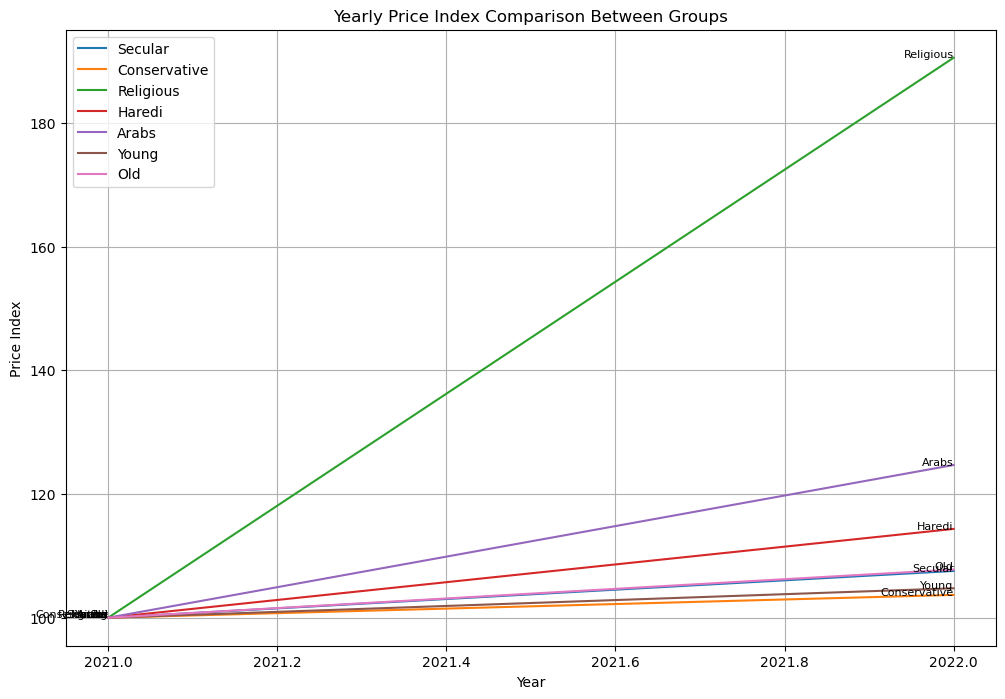

In [7]:
price_index_over_time(demo_analysis)

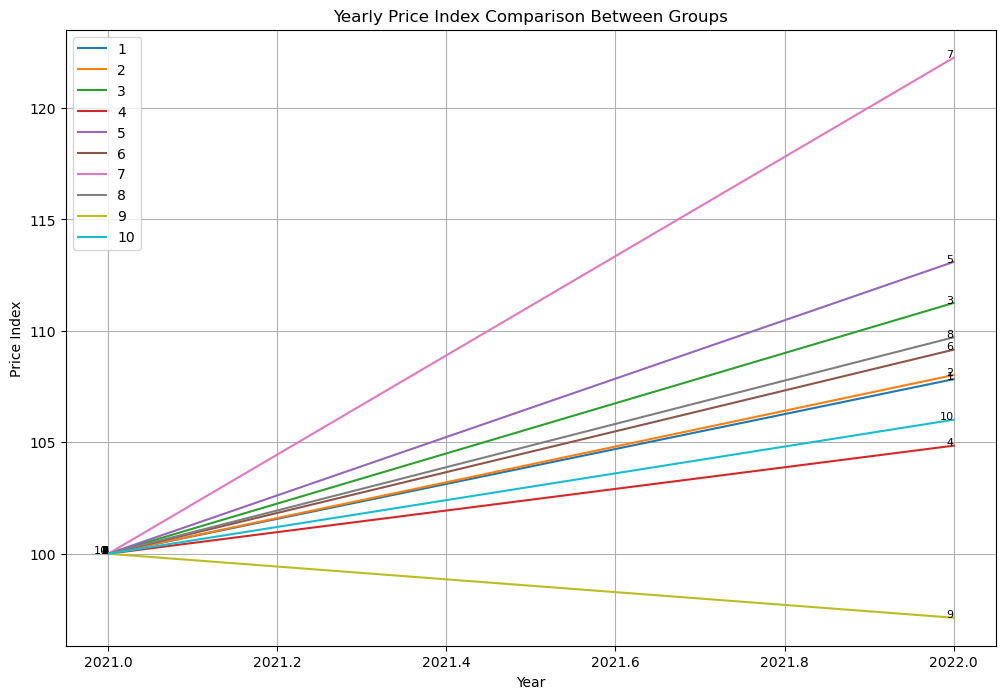

In [8]:
price_index_over_time(income_analysis)

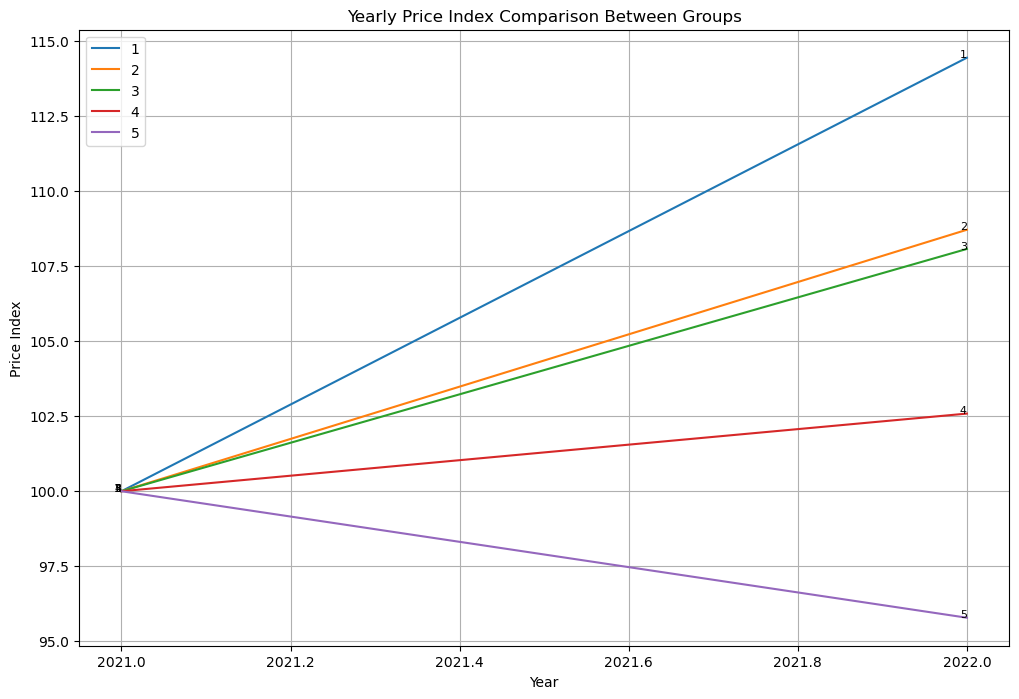

In [9]:
price_index_over_time(ses_analysis)

### Top Weight Differences

In [10]:
# Define control group
weights_comparison_control = gen_pop['combined_secondary_df'][gen_pop['combined_secondary_df']['Year'] == comparison_year]

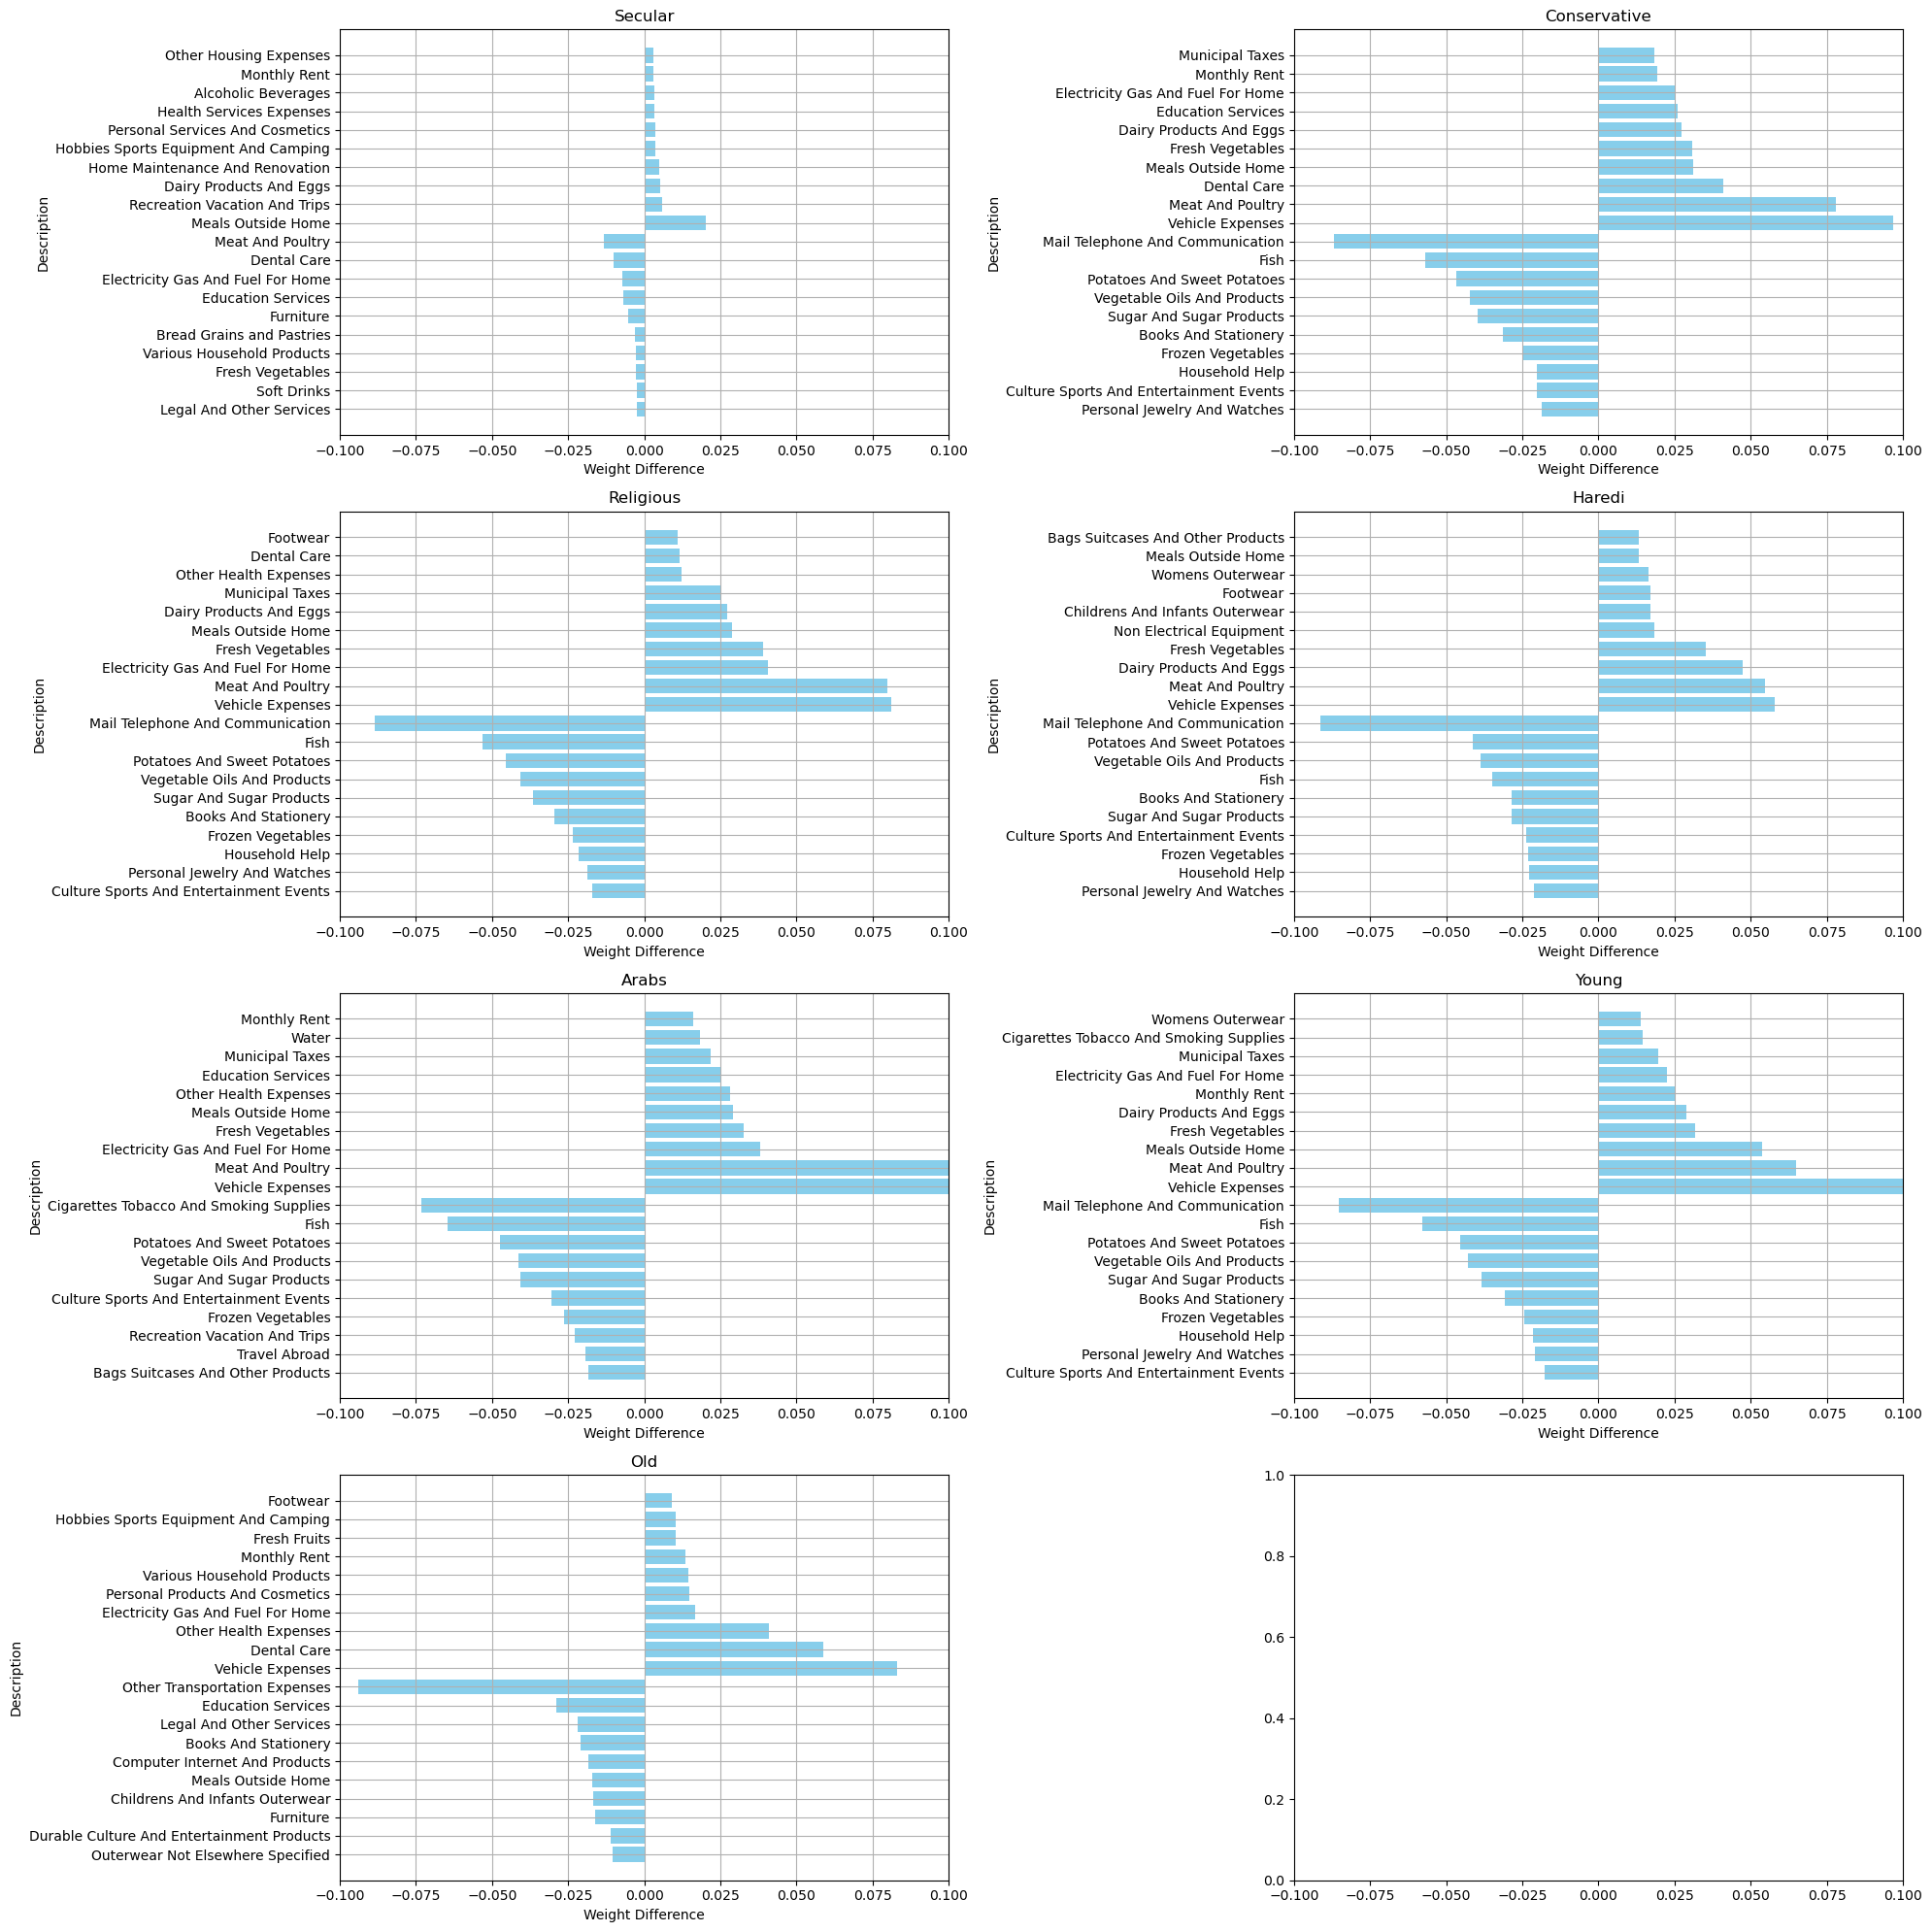

In [11]:
# Top weight differences - demograhic groups
demo_comparison_groups = {}
for group in demo_analysis:
    demo_comparison_groups[group] = demo_analysis[group]['combined_secondary_df'][demo_analysis[group]['combined_secondary_df']['Year'] == comparison_year]
top_abs_weight_differences(demo_comparison_groups, weights_comparison_control, top_n)

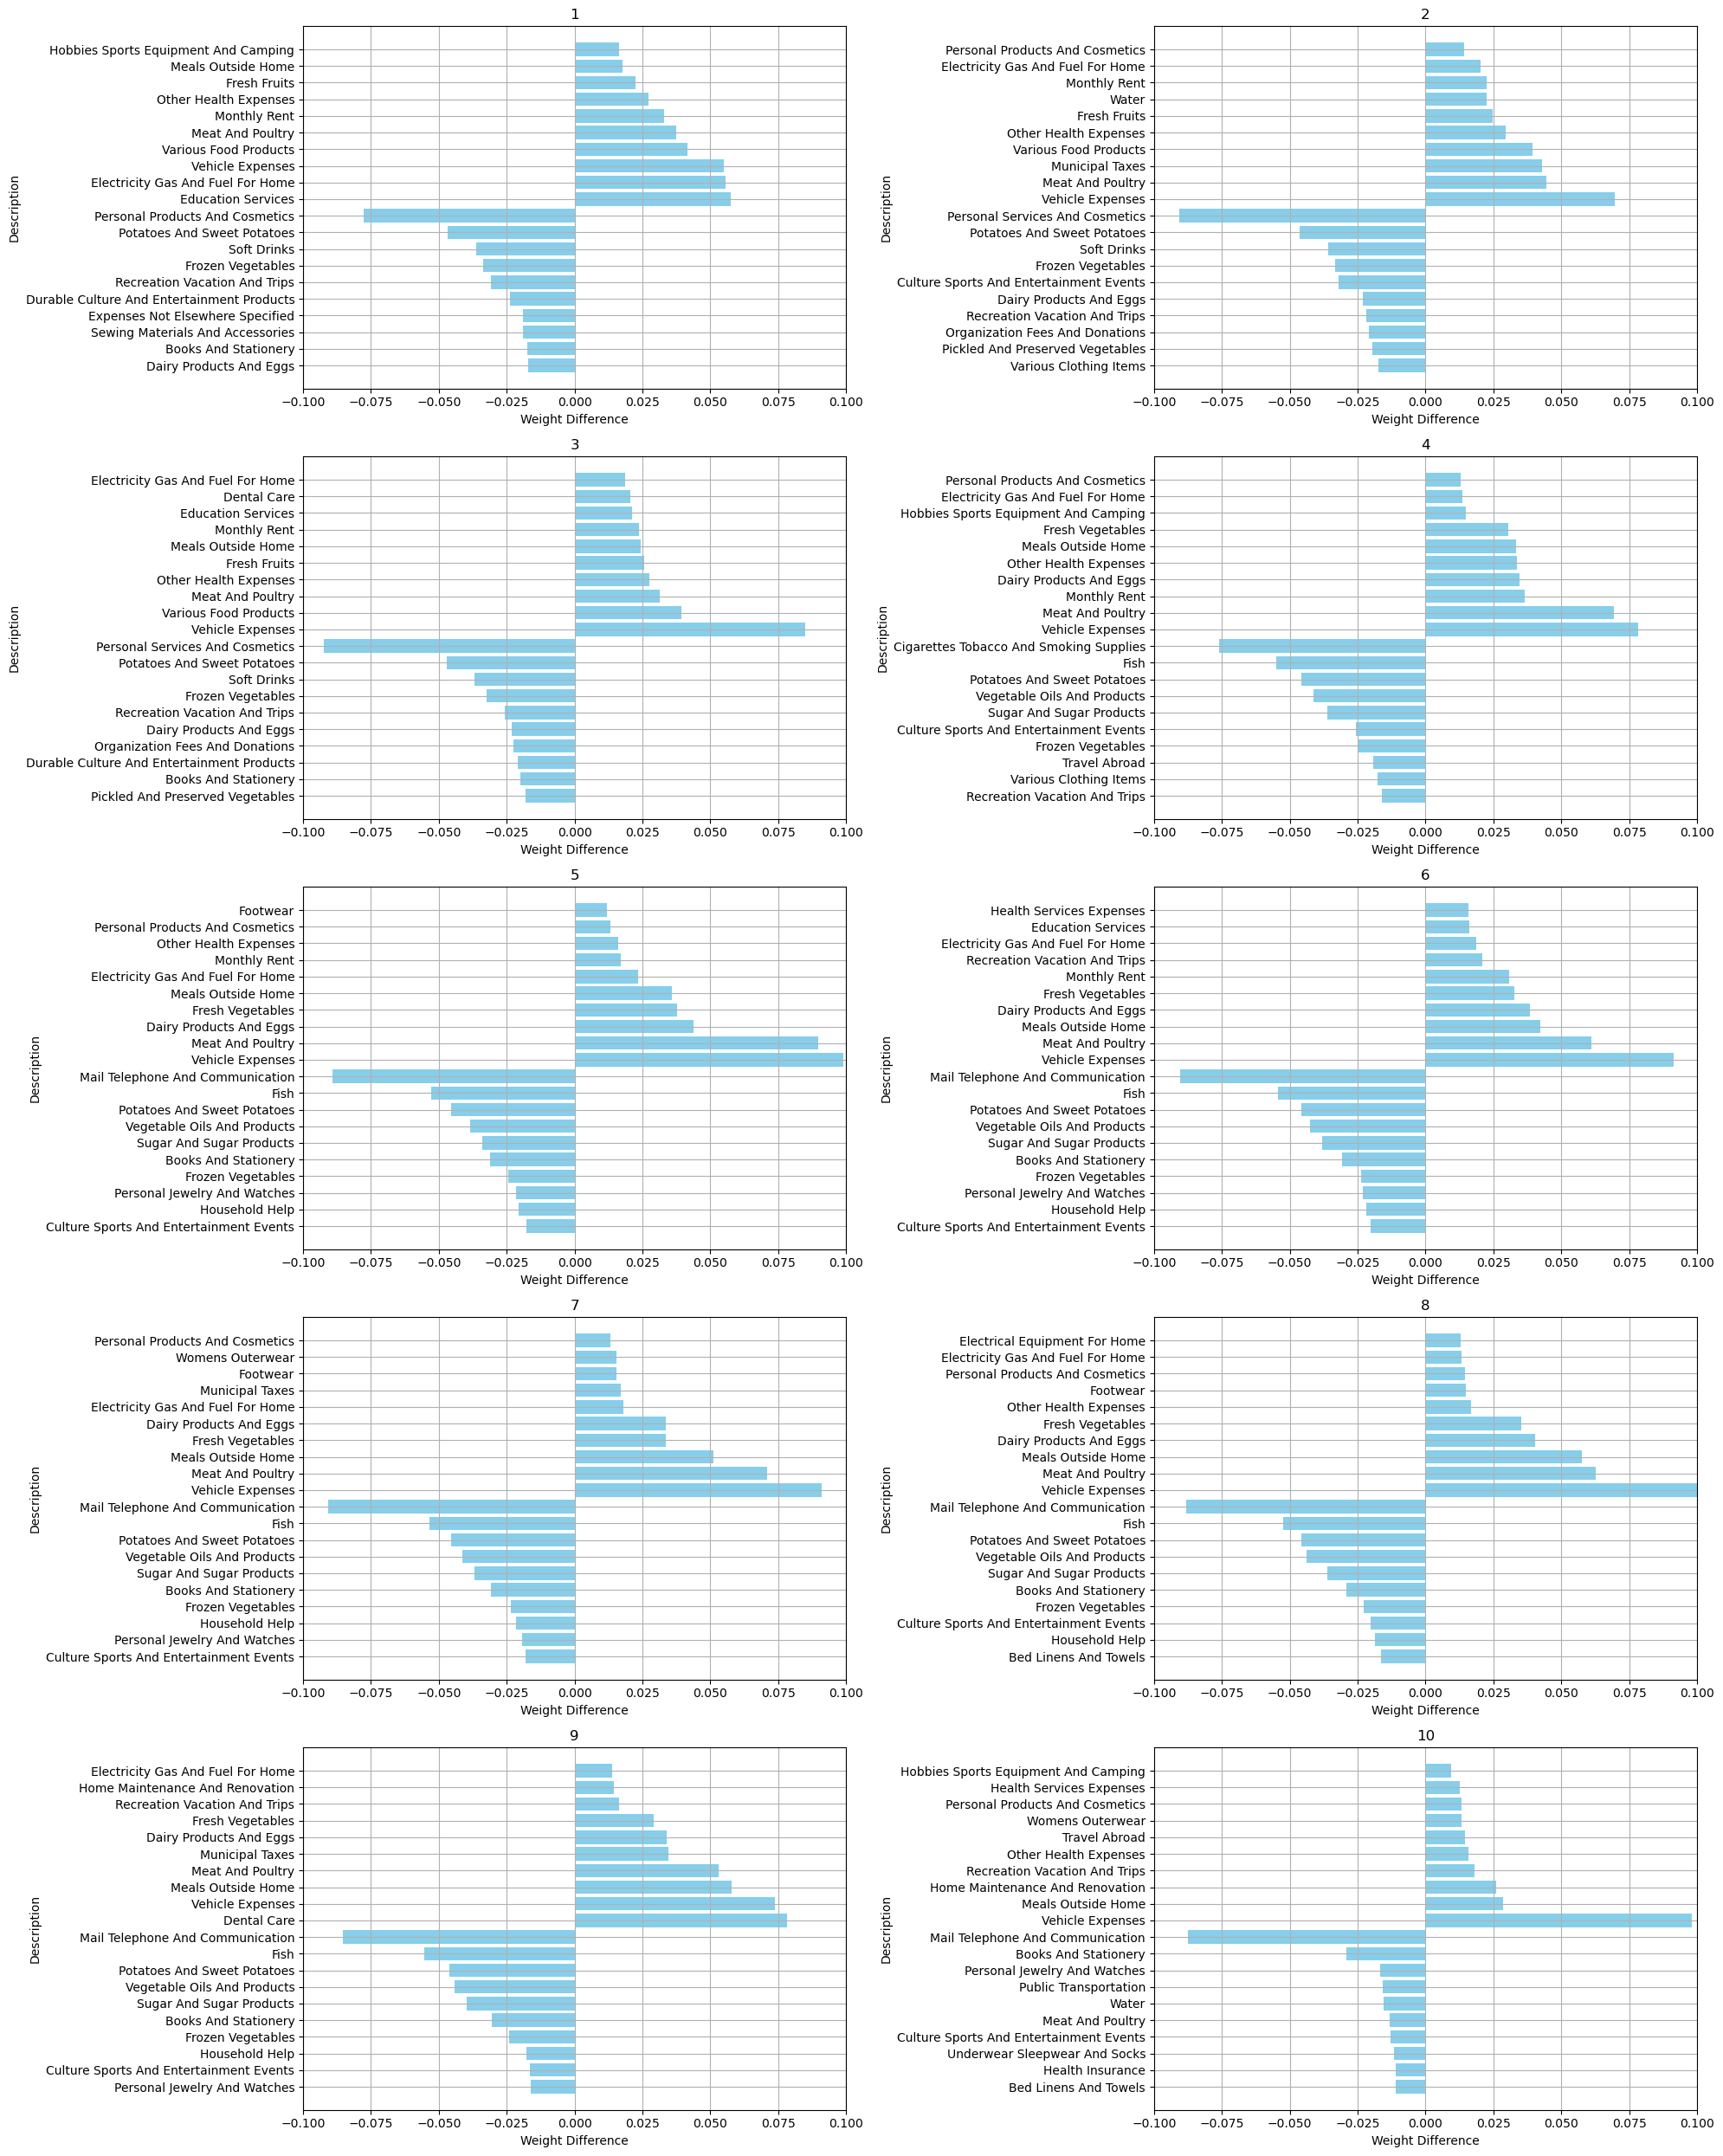

In [12]:
# Top weight differences - income groups
income_comparison_groups = {}
for group in income_analysis:
    income_comparison_groups[group] = income_analysis[group]['combined_secondary_df'][income_analysis[group]['combined_secondary_df']['Year'] == comparison_year]
top_abs_weight_differences(income_comparison_groups, weights_comparison_control, top_n)

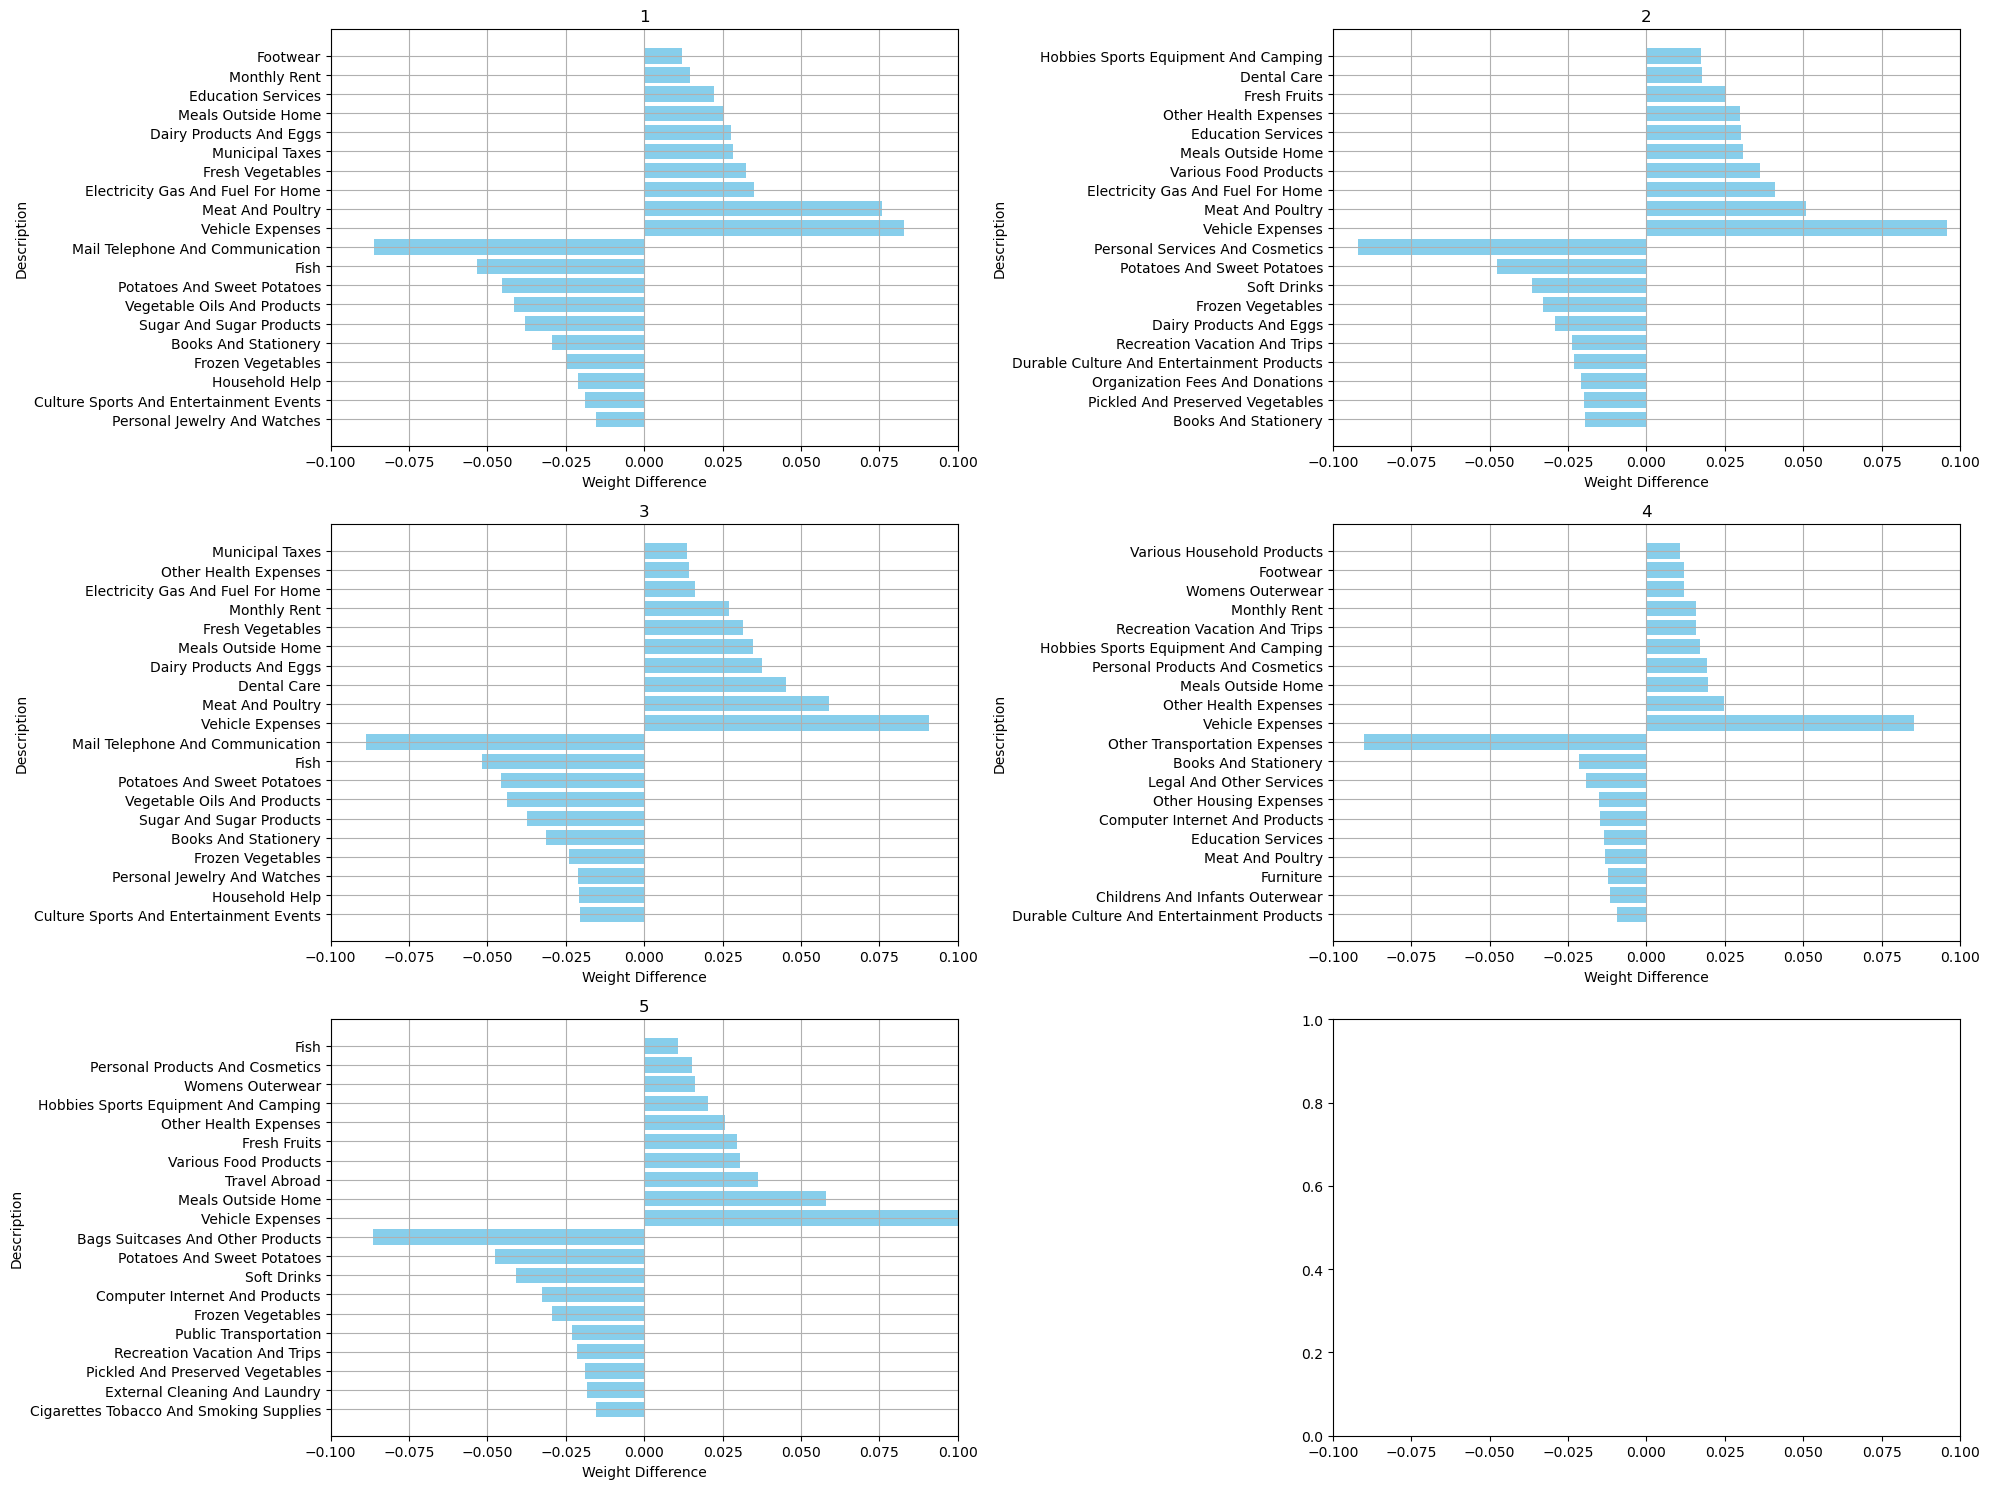

In [13]:
# Top weight differences - SES groups
ses_comparison_groups = {}
for group in ses_analysis:
    ses_comparison_groups[group] = ses_analysis[group]['combined_secondary_df'][ses_analysis[group]['combined_secondary_df']['Year'] == comparison_year]
top_abs_weight_differences(ses_comparison_groups, weights_comparison_control, top_n)

### Top Contributors to CPI Change

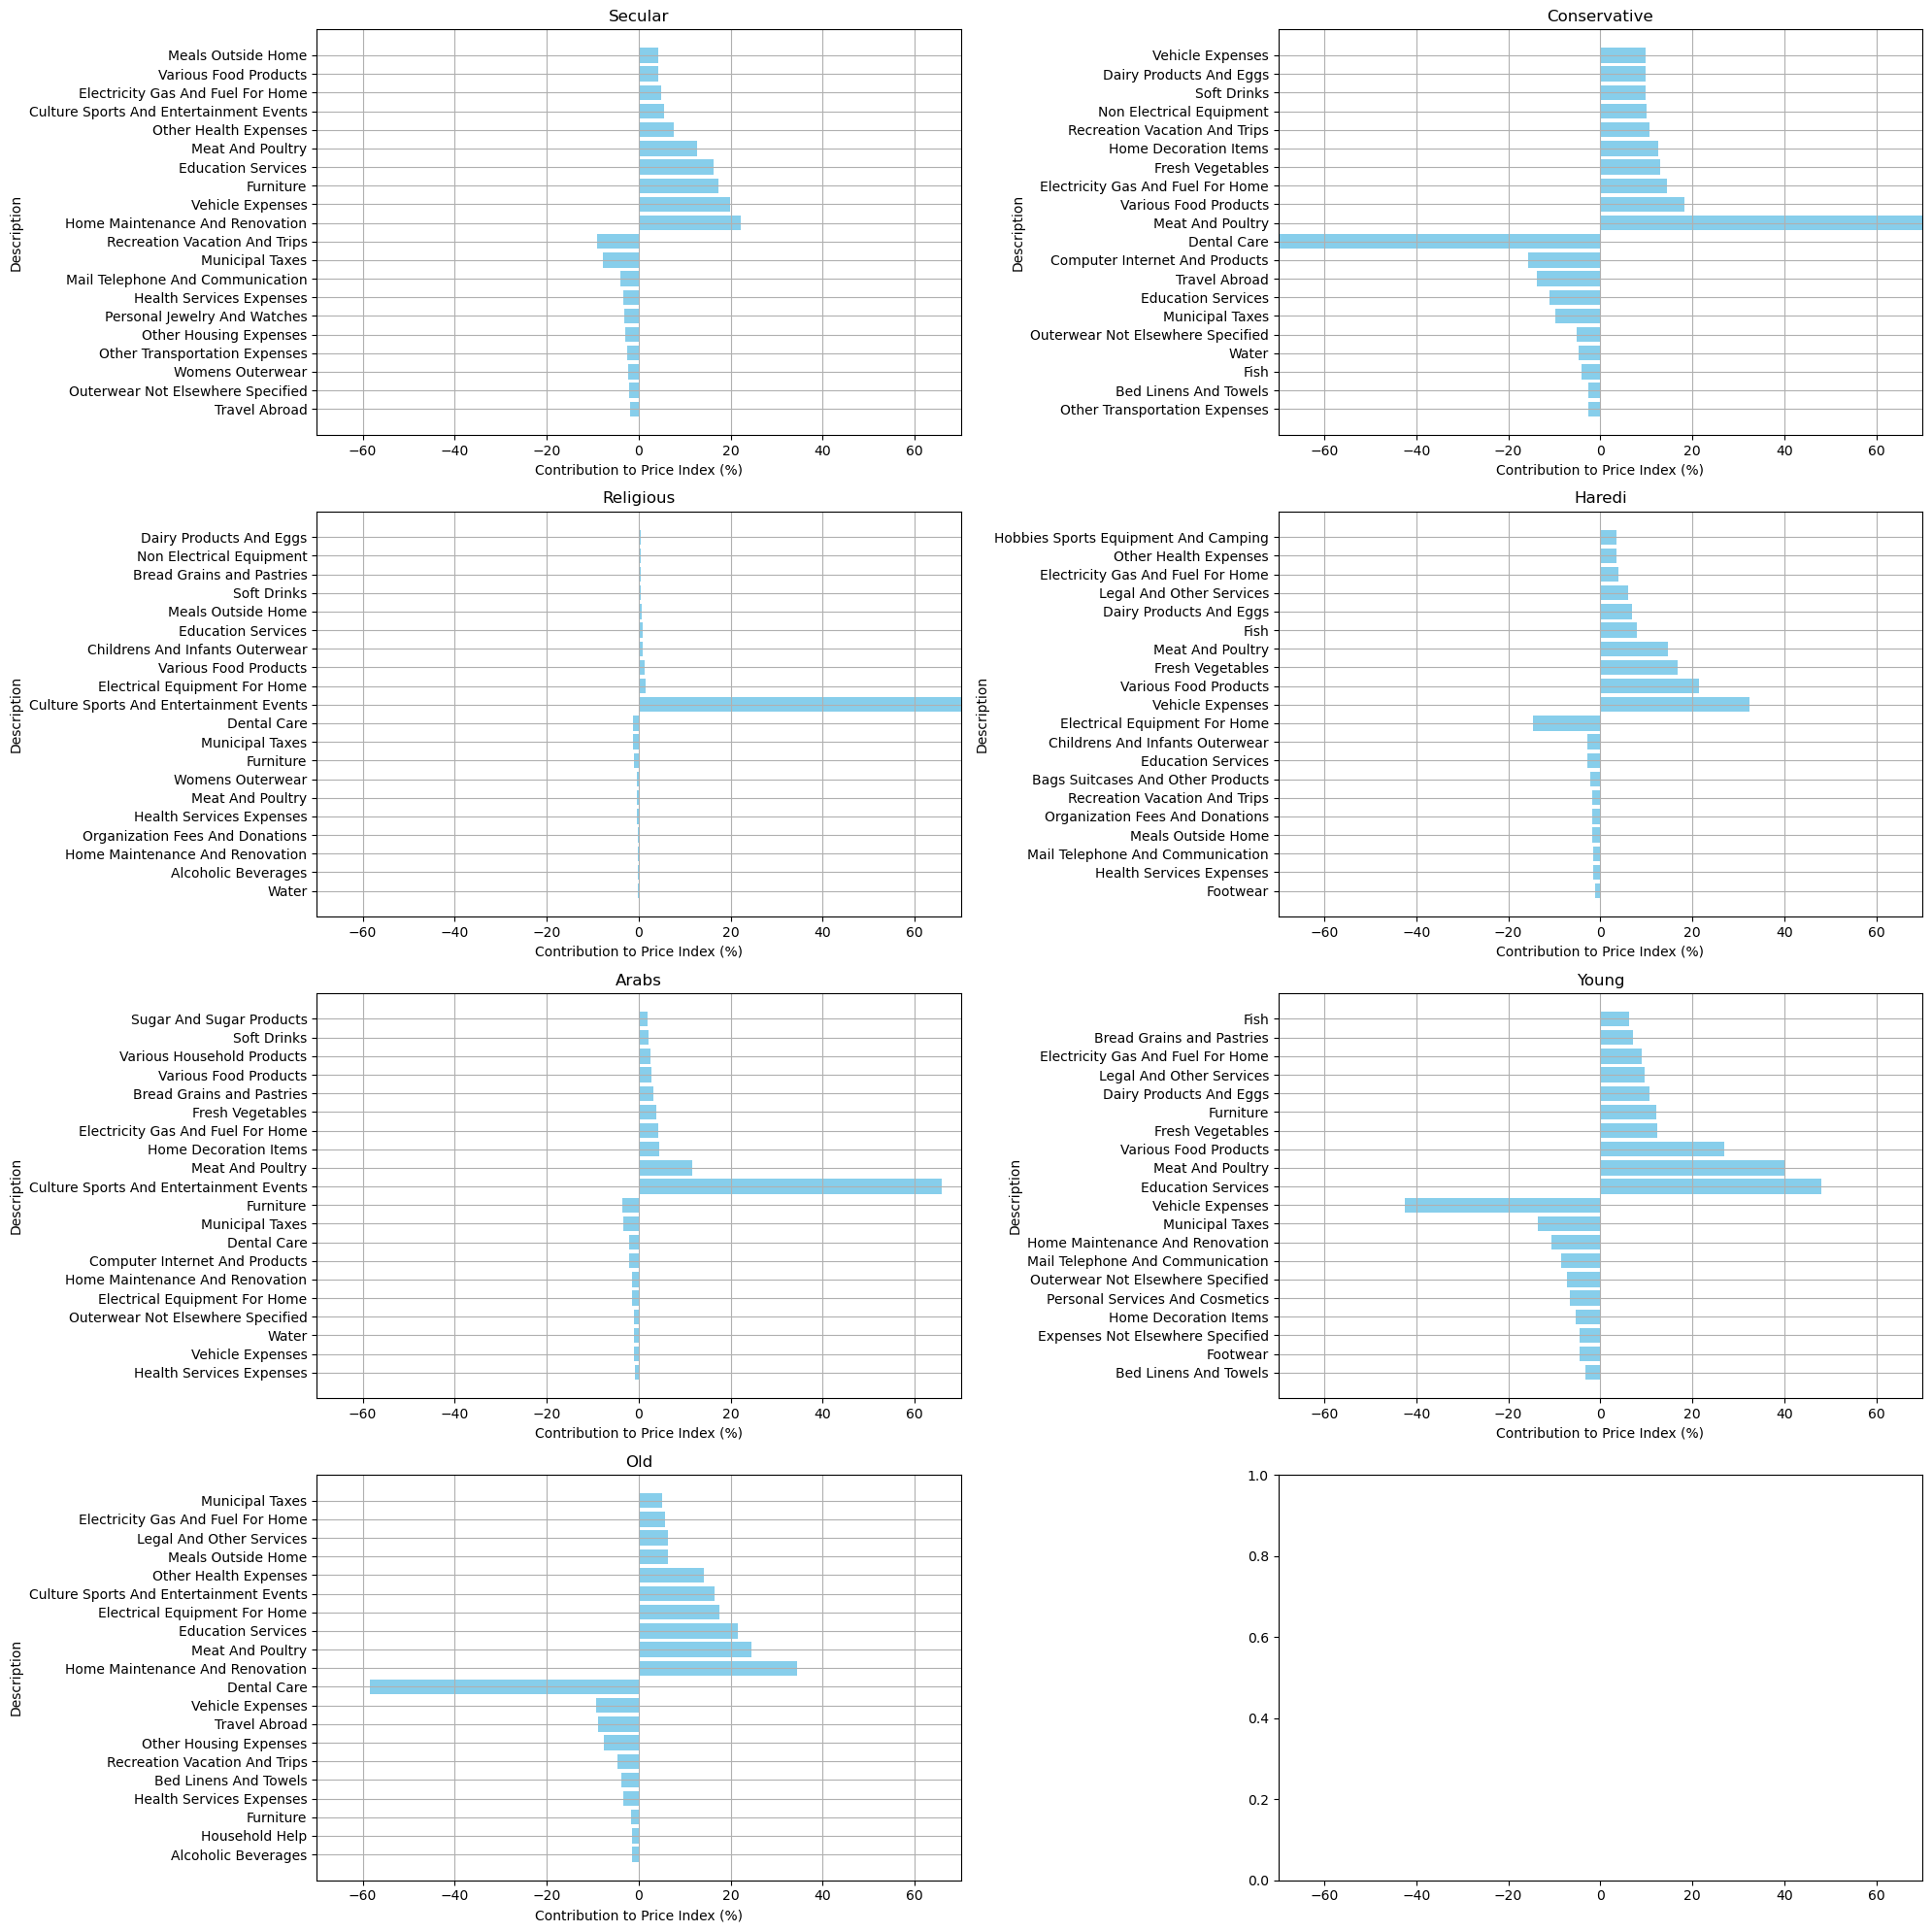

In [14]:
# Top contributors - demographic groups
demo_yearly_price_indexes = {}
for group in demo_analysis:
    demo_yearly_price_indexes[group] = demo_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(demo_comparison_groups, demo_yearly_price_indexes, top_n)

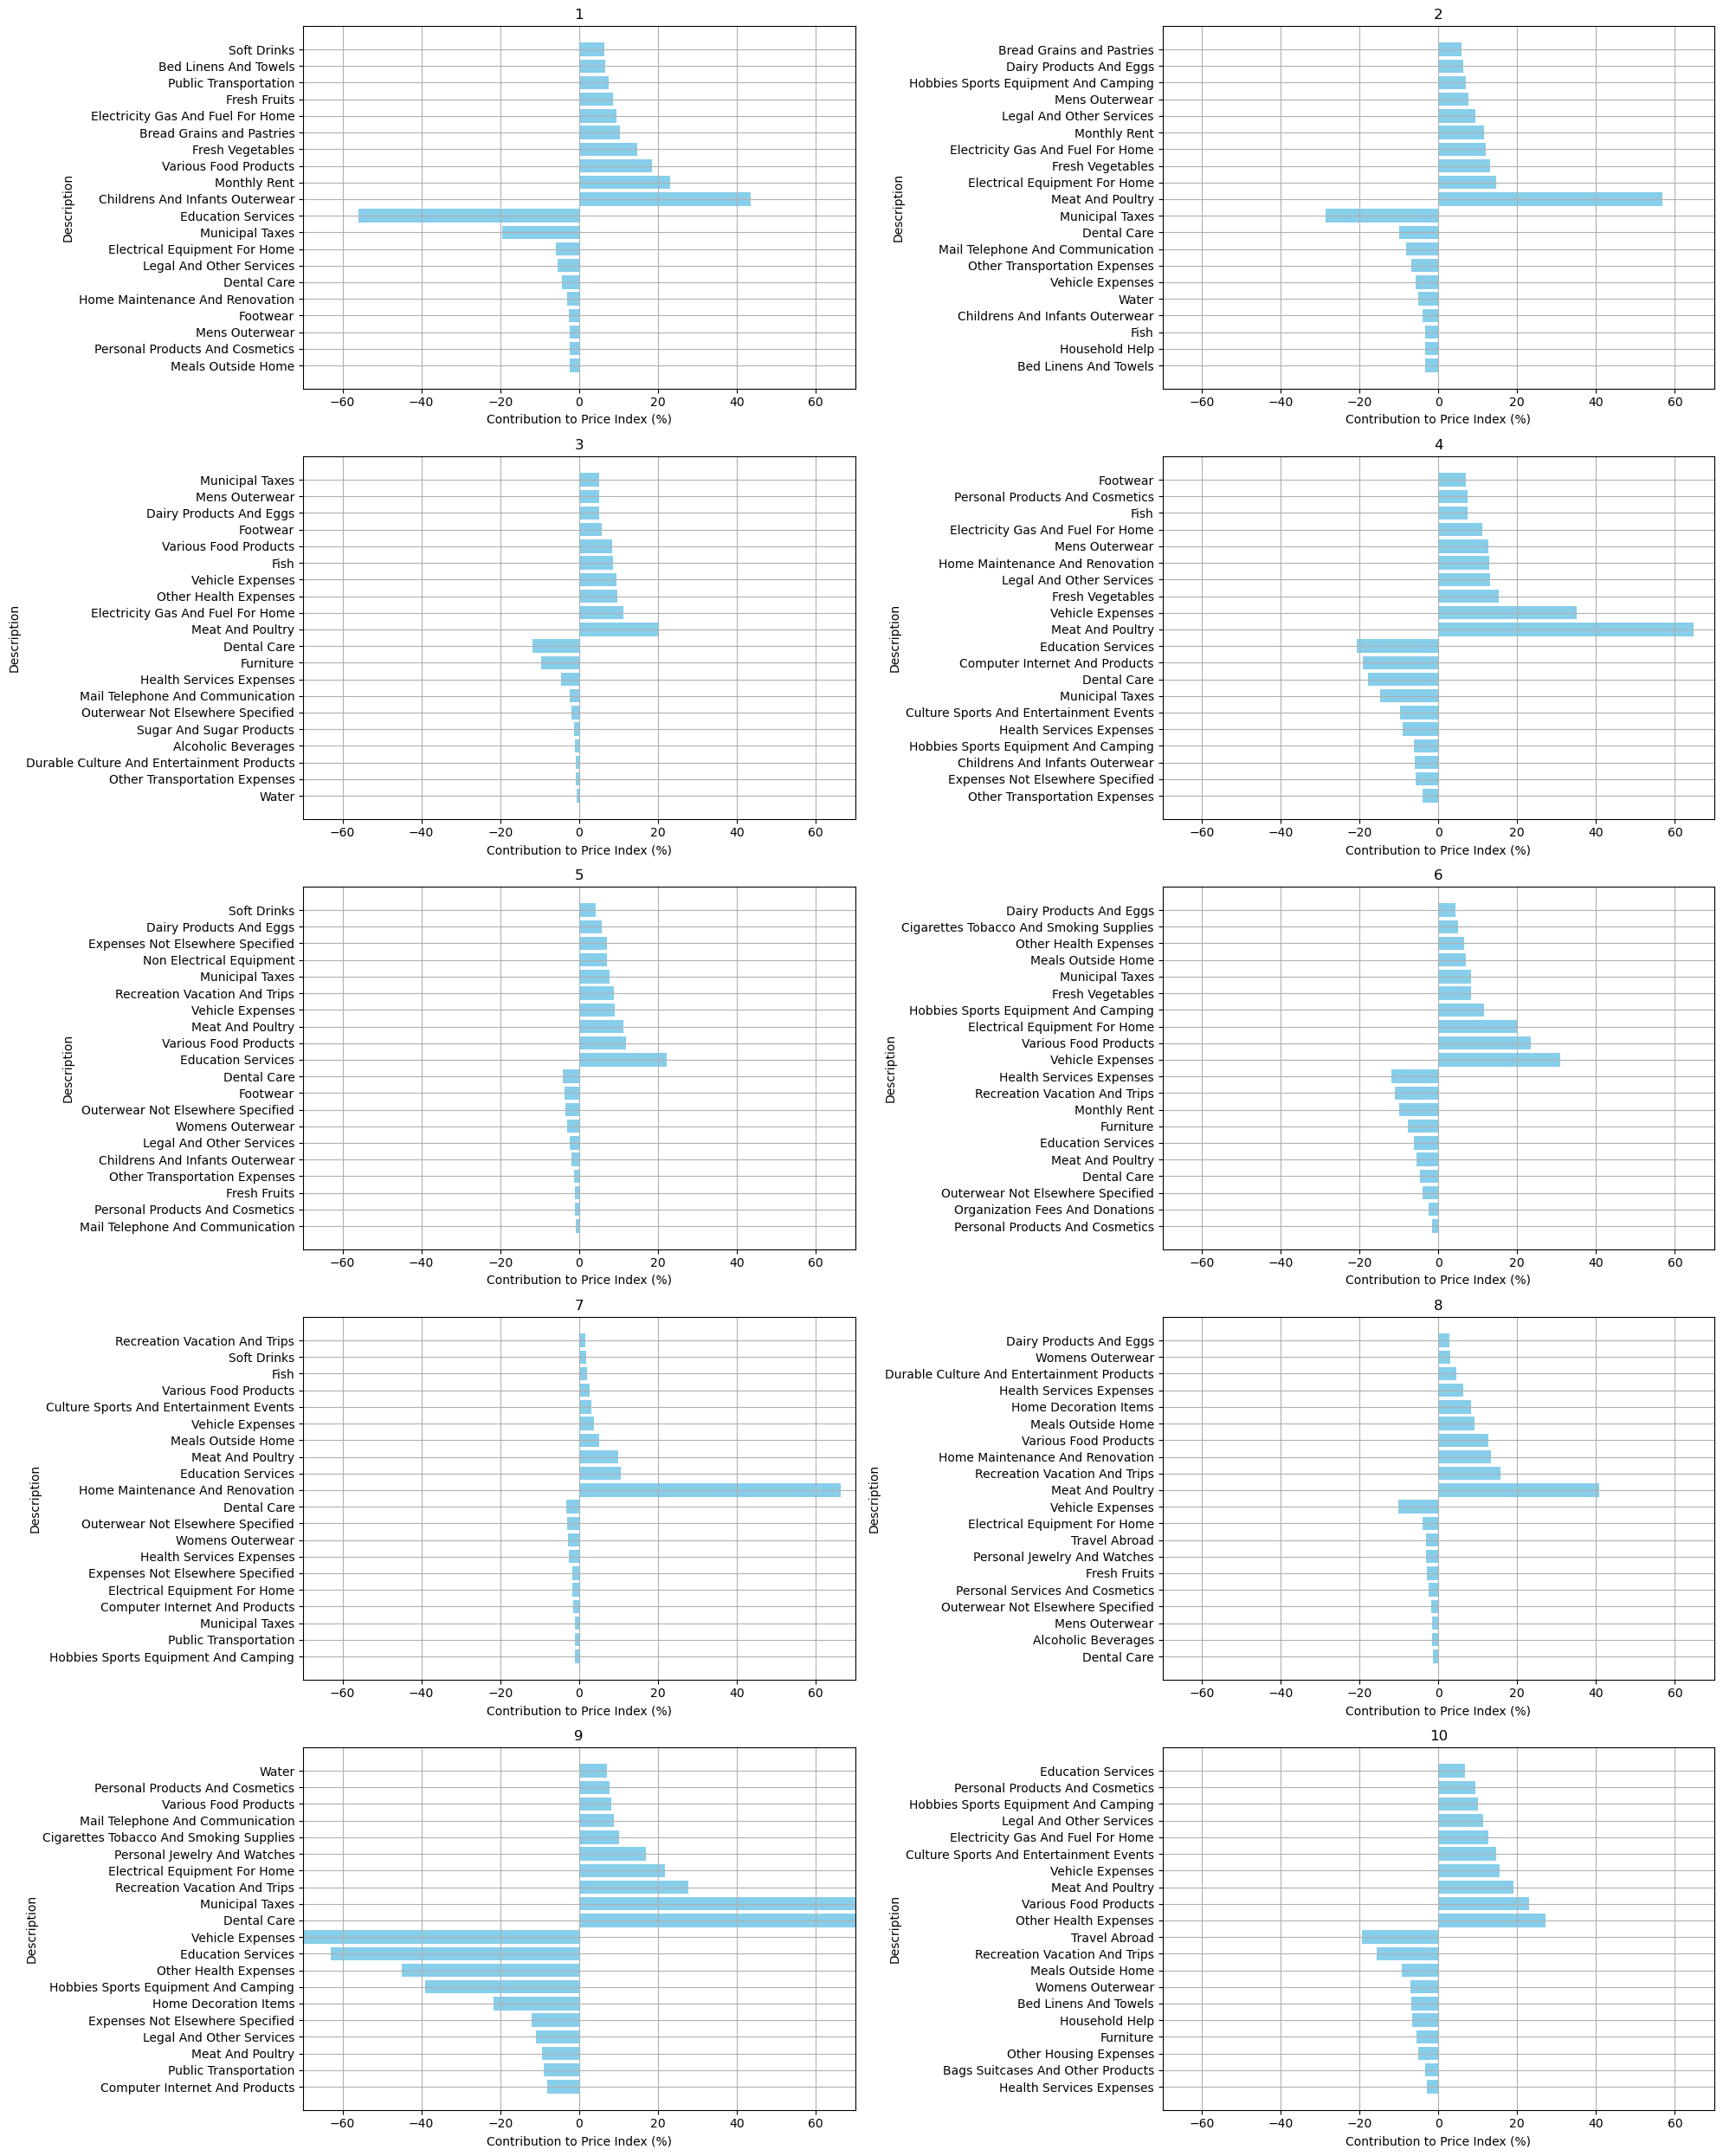

In [15]:
# Top contributors - income groups
income_yearly_price_indexes = {}
for group in income_analysis:
    income_yearly_price_indexes[group] = income_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(income_comparison_groups, income_yearly_price_indexes, top_n)

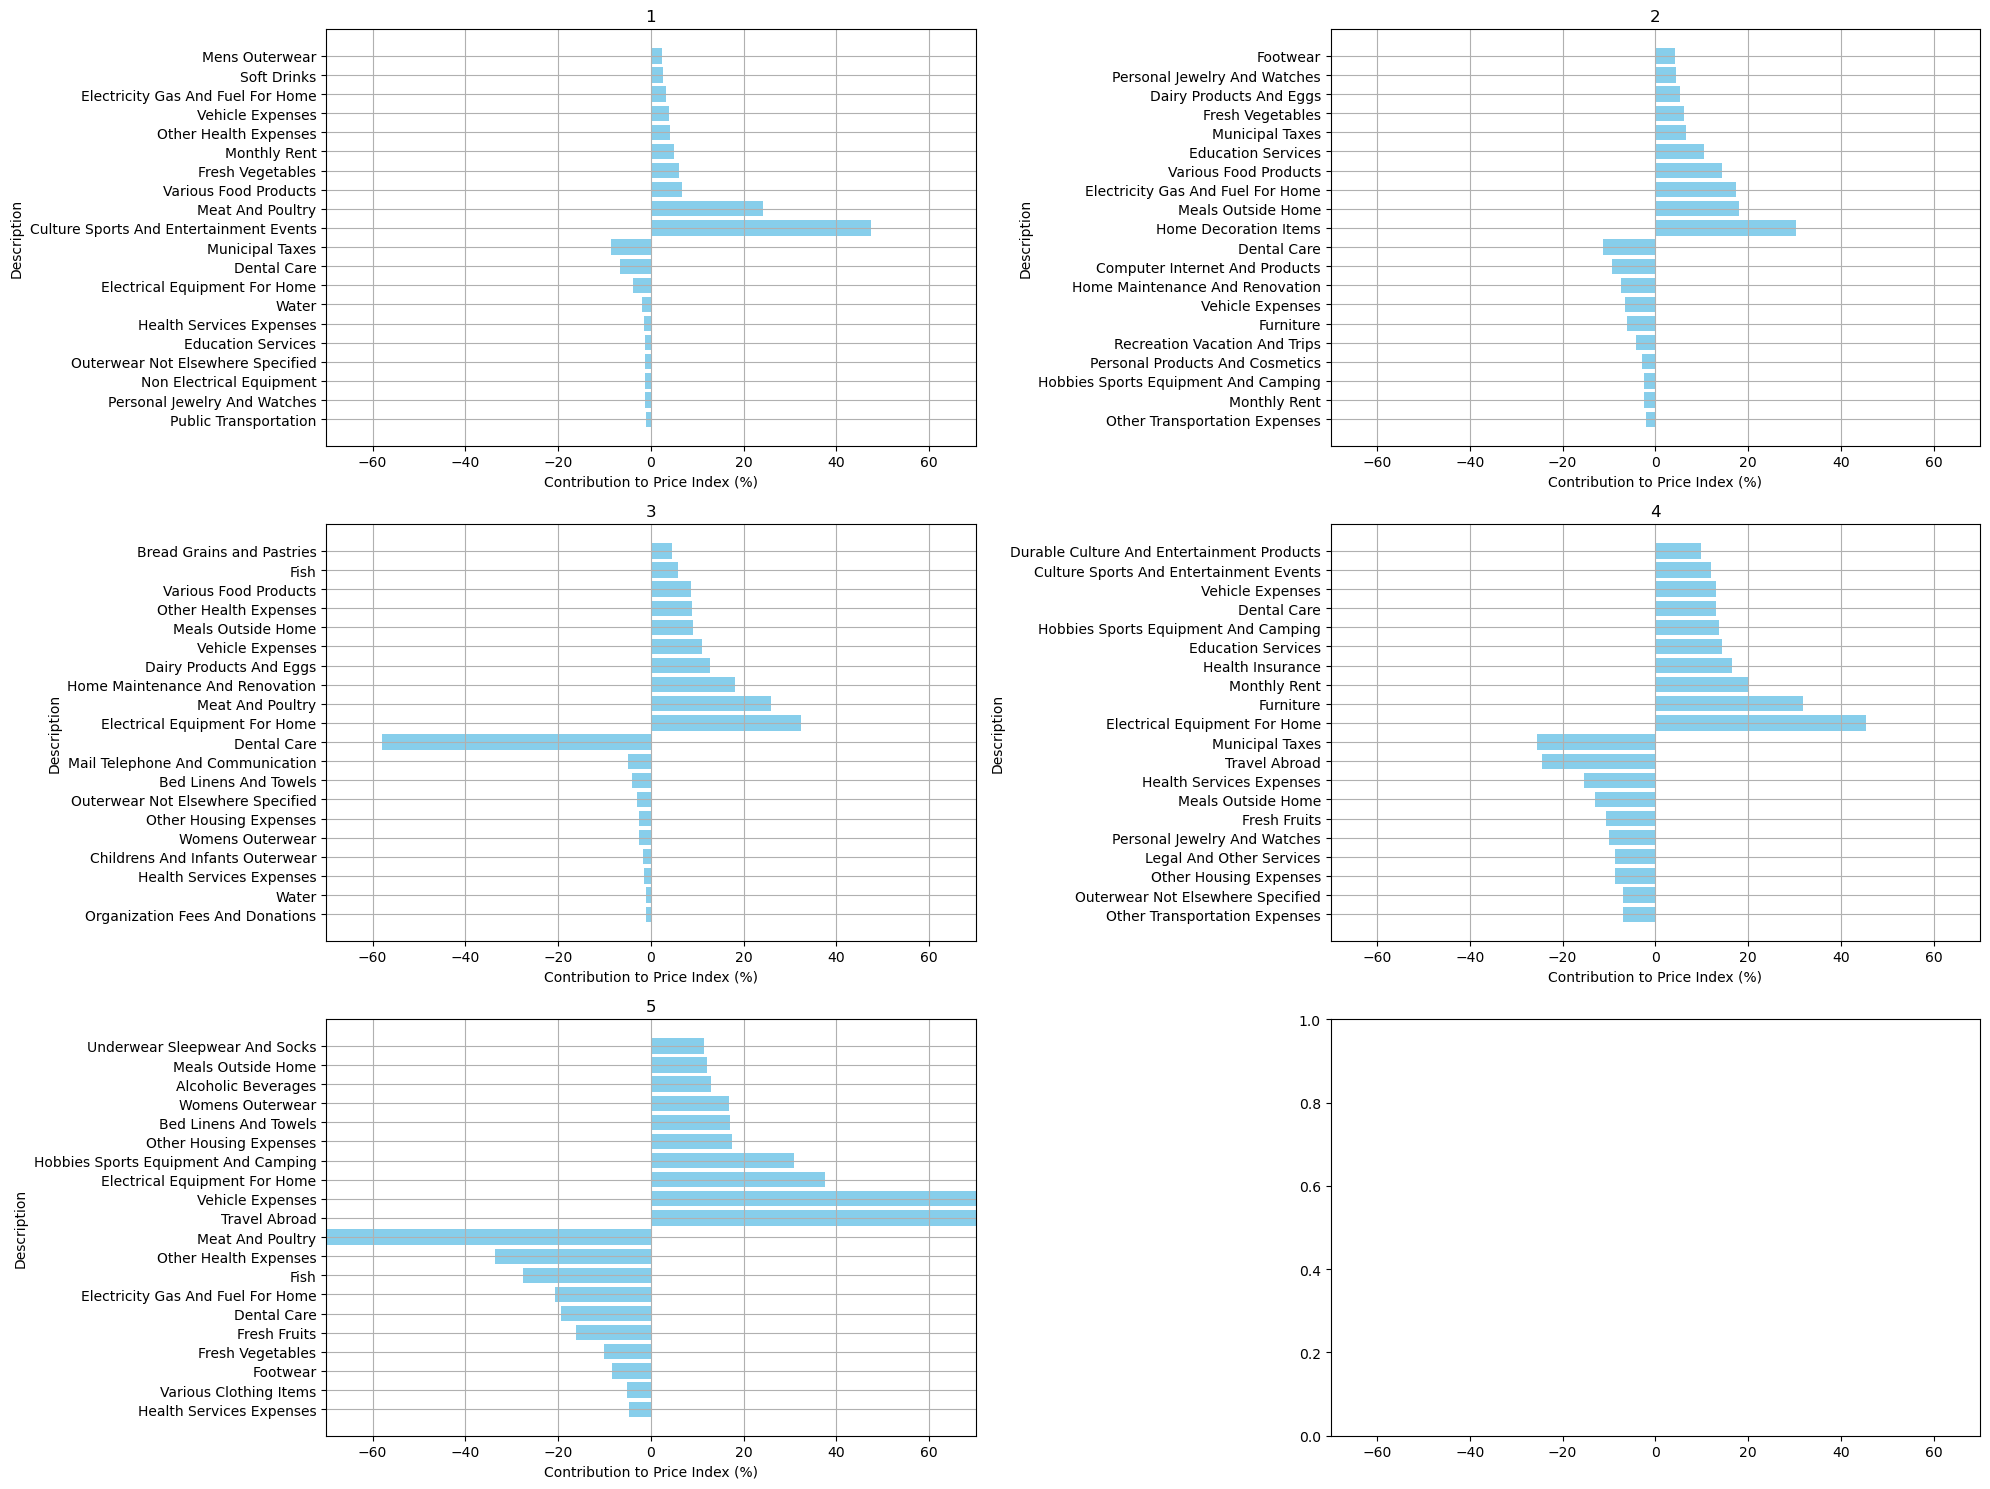

In [16]:
# Top contributors - SES groups
ses_yearly_price_indexes = {}
for group in ses_analysis:
    ses_yearly_price_indexes[group] = ses_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(ses_comparison_groups, ses_yearly_price_indexes, top_n)